In [1]:
%matplotlib widget

Integration successful: True
Final time reached: 864000000.0
Shape of solution.y: (54, 100)


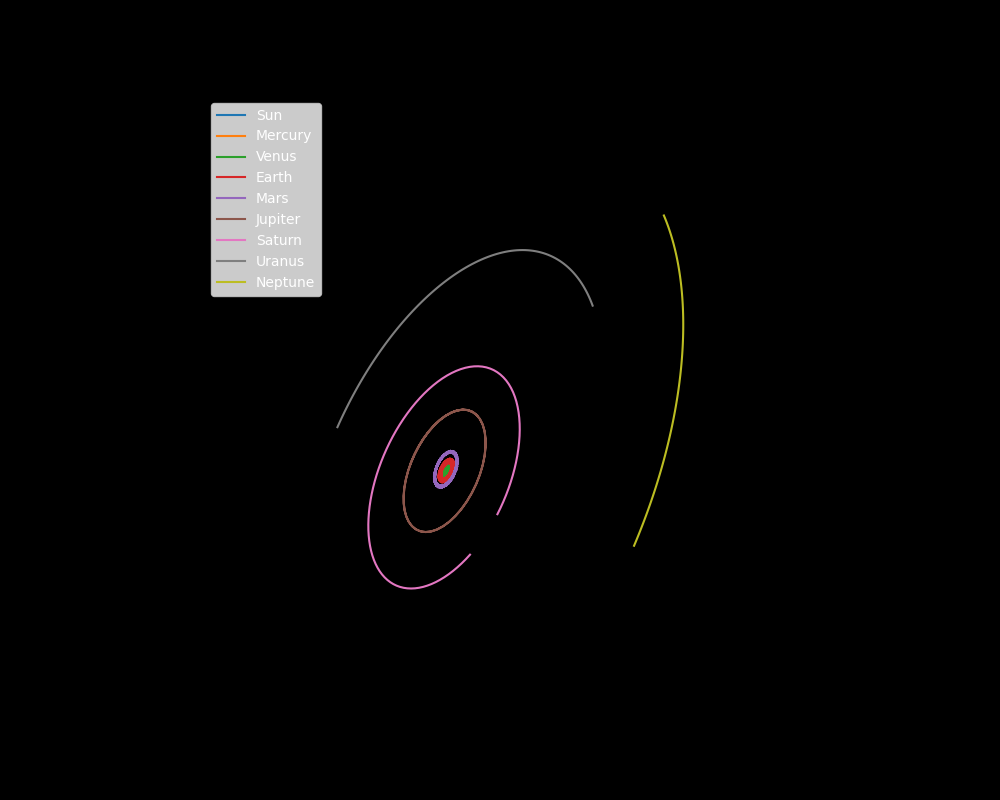

In [2]:
from integrators.scipy_ivp_integrator import integrate_system
import numpy as np
from utils.body_converter import bodies_to_state_vector
from utils.body_data_loader import load_bodies_from_json
from utils.plot_tools import plot_orbits_3d

# Load real DE440-based Body objects
bodies = load_bodies_from_json(
    "../data/body/positions.json",
    "../data/body/velocities.json",
    "../data/body/masses.json"
)

# Prepare flat initial state and masses
y0 = bodies_to_state_vector(bodies)
masses = np.array([body.mass for body in bodies])

# Simulate 1 year
T = 1e4 * 24 * 3600
t_eval = np.linspace(0, T, 100)

# Integrate using SciPy
solution = integrate_system(
    y0=y0,
    t_span=(0, T),
    masses=masses,
    t_eval=t_eval
)

# Extract position history and assign to each body
state_trajectories = solution.y.T  # shape: (time_steps, 6*N)
for i, body in enumerate(bodies):
    body.history = state_trajectories[:, i * 6 : i * 6 + 3]  # just positions

# Debug info
print("Integration successful:", solution.success)
print("Final time reached:", solution.t[-1])
print("Shape of solution.y:", solution.y.shape)

plot_orbits_3d(bodies)